#### Noisy Voronoi performance

In this notebook we look at the noisy Voronoi tesellation's test performance.

First we use the hydathode sets as seeds, and generate Voronoi tesellation of them. We subsequently test for the reference point sets and maybe other reference points' performance. 

In [2]:
import graph_create, voronoi_local, jaccard_similarity, figure_plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon 

In [3]:
sample = 'PileaTLeaf2'
G = graph_create.graph_creation(sample)

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.



__testing the hydathode set__:

In [27]:
seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
vor = Voronoi(seeds)
bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)
bounded_noisy_regions  = jaccard_similarity.bounded_noisy_polygons(G, vor, noise = 2)

In [28]:
noise_list = [1, 2, 5, 10, 20, 50, 100]
J_mean_list = []

for noise in noise_list:
    bounded_noisy_regions  = jaccard_similarity.bounded_noisy_polygons(G, vor, noise)
    J_list_noise = jaccard_similarity.overlap_noisy_vertices(G, seeds, bounded_regions, bounded_noisy_regions)
    J_mean_list.append(J_list_noise.mean())

In [29]:
J_mean_df = pd.DataFrame(np.array([noise_list, J_mean_list]).T, columns = ['noise_pixel', 'J_index'])

In [30]:
J_mean_df

,noise_pixel,J_index
0,1.0,0.993692
1,2.0,0.987095
2,5.0,0.967072
3,10.0,0.933710
4,20.0,0.874201
5,50.0,0.738563
6,100.0,0.549985


__mean axes length to have an idea of the magnitude of the noise:__

In [9]:
representative_axes = []

for face in G.graph['faces']:
    poly = Polygon(face)
    representative_axes.append(.5*((poly.bounds[2]-poly.bounds[0]) + (poly.bounds[3]-poly.bounds[1])))


In [11]:
print(f'the mean polygon axes length is {np.array(representative_axes).mean():.2f}.')

the mean polygon axes length is 478.74.


__use other point sets as seeds:__

In [12]:
centroid_seeds, midpoint_seeds, random_seeds = jaccard_similarity.hybrid_seeds(G)

In [32]:
def noisy_graph_J_index(seeds):

    seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
    vor = Voronoi(seeds)
    bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
    J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)
    bounded_noisy_regions  = jaccard_similarity.bounded_noisy_polygons(G, vor, noise = 2)

    noise_list = [1, 2, 5, 10, 20, 50, 100]
    J_mean_list = []

    for noise in noise_list:
        bounded_noisy_regions  = jaccard_similarity.bounded_noisy_polygons(G, vor, noise)
        J_list_noise = jaccard_similarity.overlap_noisy_vertices(G, seeds, bounded_regions, bounded_noisy_regions)
        J_mean_list.append(J_list_noise.mean())

    J_mean_df = pd.DataFrame(np.array([noise_list, J_mean_list]).T, columns = ['noise_pixel', 'J_index'])

    return J_mean_df

In [33]:
J_mean_centroid_df = noisy_graph_J_index(centroid_seeds)
J_mean_midpoint_df = noisy_graph_J_index(midpoint_seeds)
J_mean_random_df = noisy_graph_J_index(random_seeds)

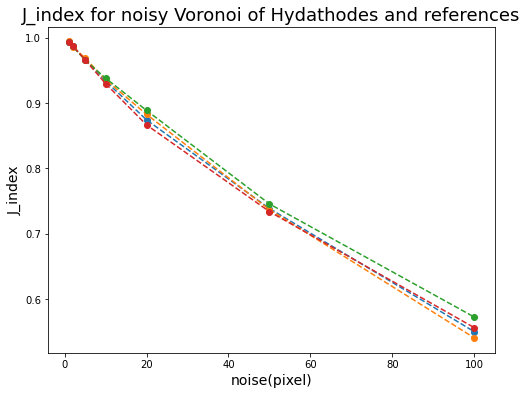

In [45]:
# plot the results of different point sets:

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(J_mean_df['noise_pixel'], J_mean_df['J_index'], linestyle='--', marker='o')
ax.plot(J_mean_centroid_df['noise_pixel'], J_mean_centroid_df['J_index'], linestyle='--', marker='o')
ax.plot(J_mean_midpoint_df['noise_pixel'], J_mean_midpoint_df['J_index'], linestyle='--', marker='o')
ax.plot(J_mean_random_df['noise_pixel'], J_mean_random_df['J_index'], linestyle='--', marker='o')
ax.set_xlabel('noise(pixel)', fontsize = 14)
ax.set_ylabel('J_index', fontsize = 14)
ax.set_title('J_index for noisy Voronoi of Hydathodes and references', fontsize = 18)
fig.savefig('test_results/noisy_Voronoi_J_index.pdf')